___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

A similar study with the dataset in R, it is helpful to understand the features and target

https://rstudio-pubs-static.s3.amazonaws.com/160297_f7bcb8d140b74bd19b758eb328344908.html

What does hillshade mean?

http://www.geography.hunter.cuny.edu/~jochen/gtech361/lectures/lecture11/concepts/hillshade.htm

In [2]:
df=pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.sample(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
86526,2189,11,23,300,79,473,188,186,128,221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
179825,3386,160,9,330,74,1448,230,242,143,2893,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
81309,2291,291,22,244,107,869,153,230,214,562,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
122705,2985,54,19,162,26,5198,227,196,94,2542,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
22271,3369,69,38,210,169,2646,229,138,6,450,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7


In [4]:
df.shape

(250000, 55)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [8]:
df.Cover_Type.value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

In [9]:
pd.DataFrame(data = {"Value_Counts" : df.Cover_Type.value_counts(), "Value_Counts_Percentage" : df['Cover_Type'].value_counts(normalize=True)} )

,Value_Counts,Value_Counts_Percentage
5,36079,0.144
1,35836,0.143
2,35780,0.143
6,35695,0.143
7,35690,0.143
4,35529,0.142
3,35391,0.142


In [10]:
df.iloc[:,0:11].nunique()

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
dtype: int64

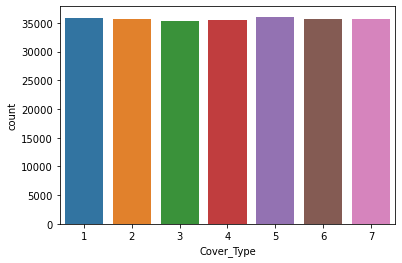

In [11]:
sns.countplot(df.Cover_Type);

In [12]:
df.corr()['Cover_Type'].sort_values()

Wilderness_Area_1                    -0.234
Soil_Type_29                         -0.226
Soil_Type_22                         -0.195
Soil_Type_23                         -0.158
Soil_Type_12                         -0.133
Soil_Type_32                         -0.113
Horizontal_Distance_To_Roadways      -0.108
Hillshade_Noon                       -0.107
Soil_Type_24                         -0.105
Soil_Type_31                         -0.100
Soil_Type_33                         -0.092
Horizontal_Distance_To_Fire_Points   -0.089
Hillshade_3pm                        -0.055
Soil_Type_20                         -0.047
Soil_Type_19                         -0.045
Soil_Type_4                          -0.034
Soil_Type_21                         -0.030
Soil_Type_9                          -0.027
Soil_Type_27                         -0.022
Hillshade_9am                        -0.018
Soil_Type_28                         -0.018
Soil_Type_25                         -0.017
Soil_Type_3                     

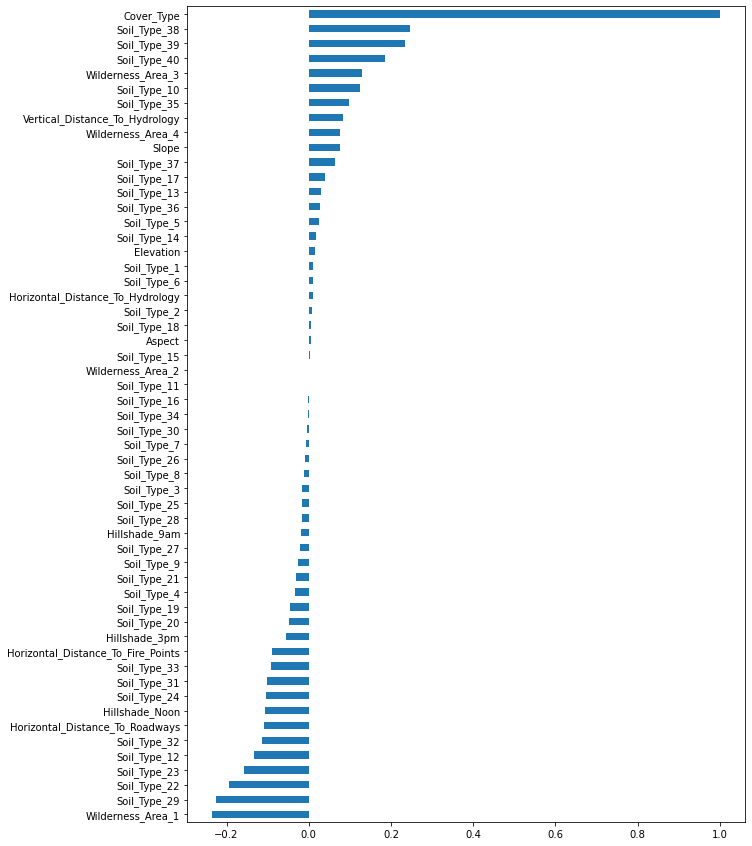

In [13]:
df.corr()['Cover_Type'].sort_values().plot.barh(figsize=(10,15));

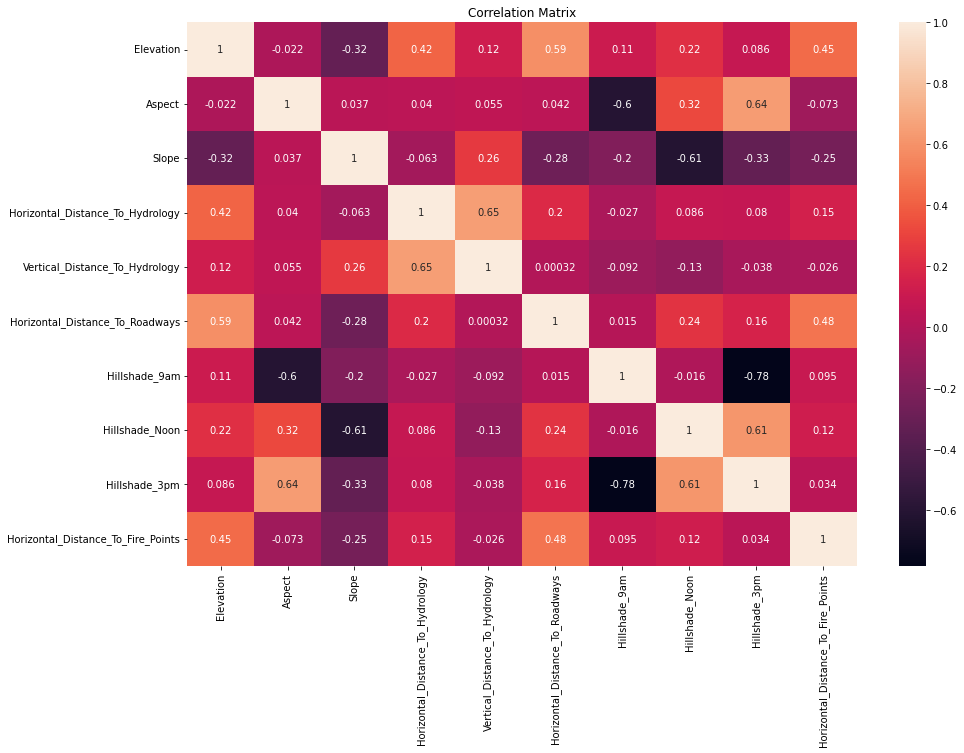

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df[df.columns[:10]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [16]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

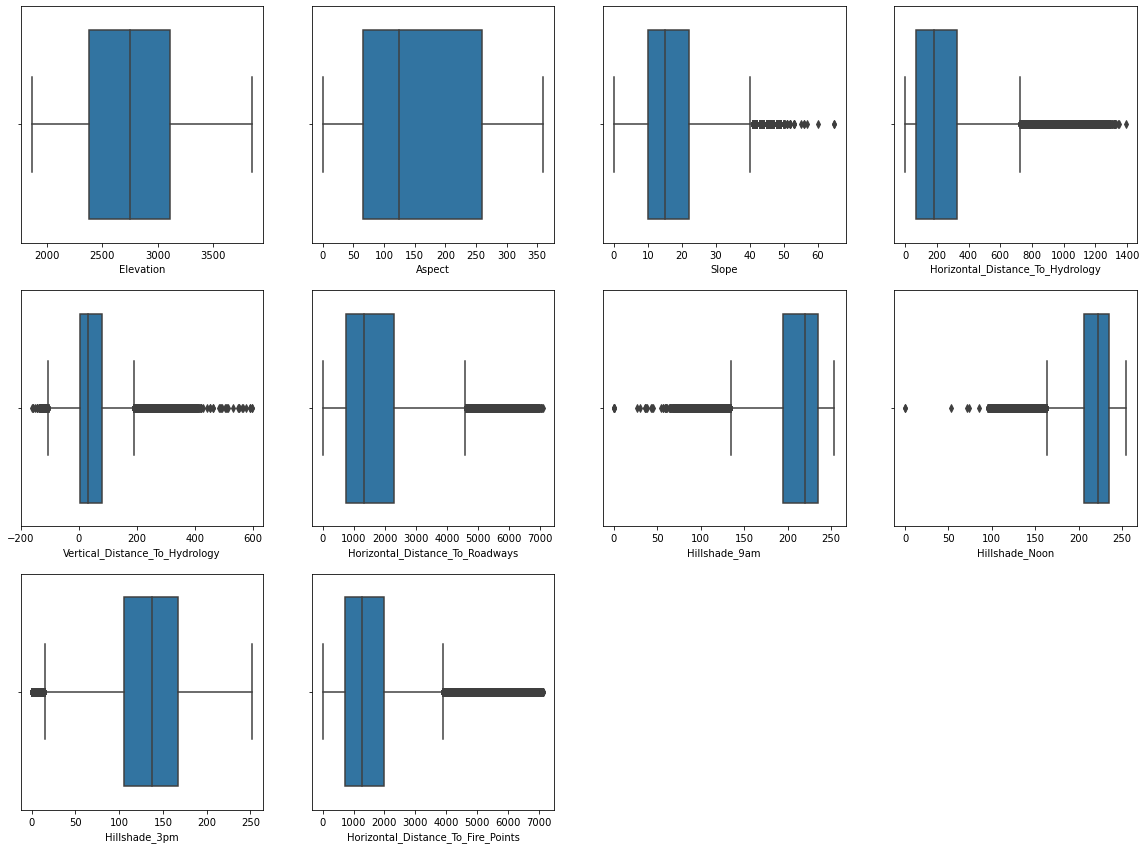

In [17]:
index=0
plt.figure(figsize=(20,20))
for i in df.columns[:10]:
    index +=1
    plt.subplot(4,4,index)
    sns.boxplot(x=i,data=df, whis=1.5)

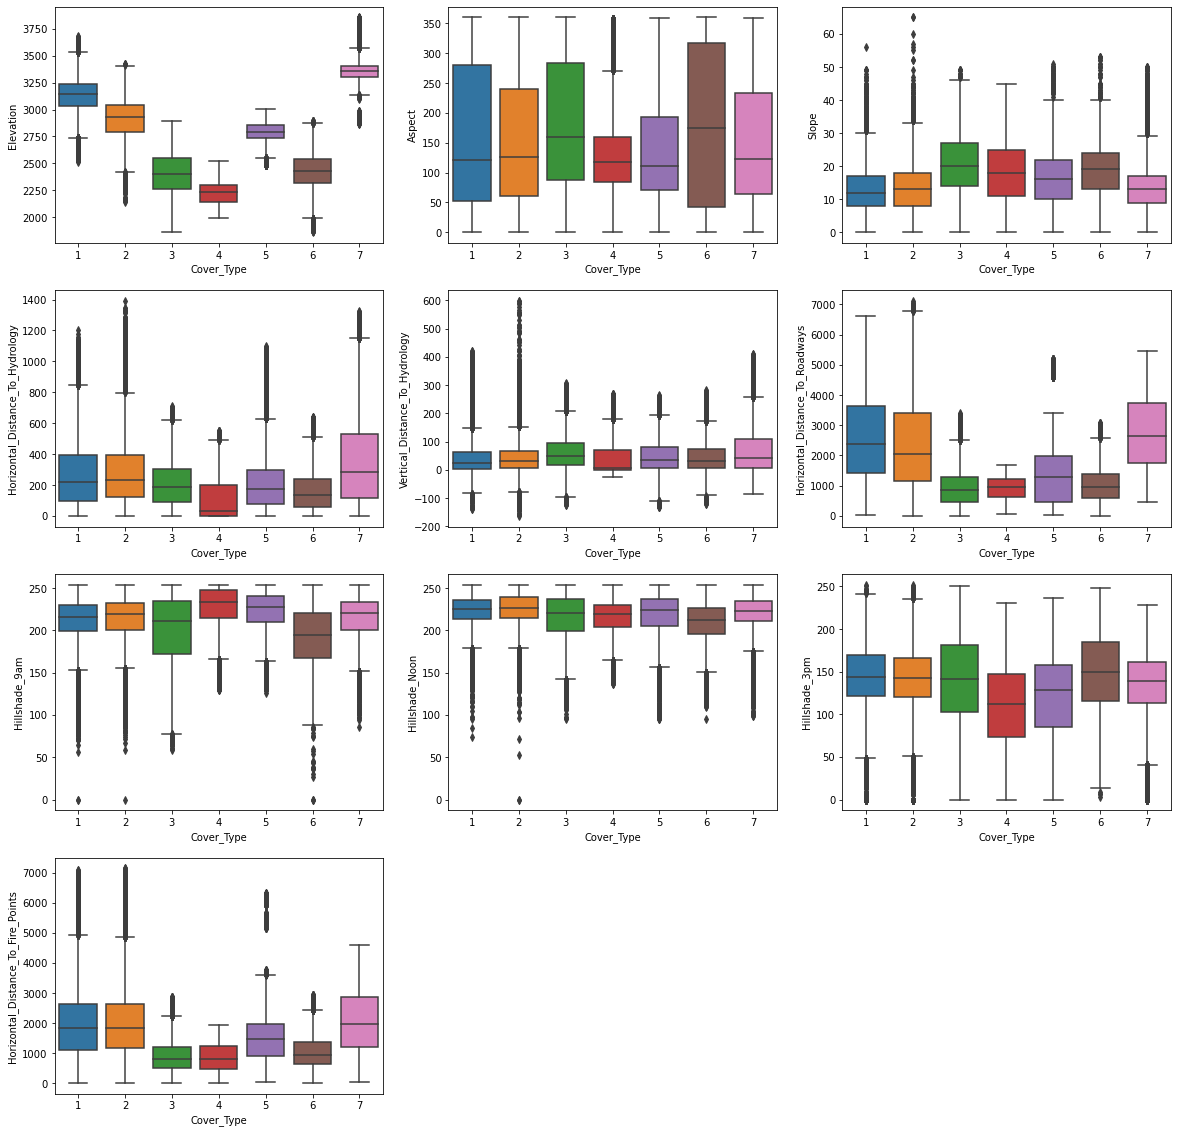

In [18]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = df, whis=1.5)

### Deal with Outliers

#### *ii. Drop Outliers*

In [20]:
# FINDING AND REMOVING OUTLIERS
# This function gives the data without outliers, we took whisker 3

def not_out_find(df_in, column):
    q1=df_in[column].quantile(0.25)
    q3=df_in[column].quantile(0.75)
    ıqr=q3-q1
    low_lim=q1-3*ıqr
    high_lim=q3+3*ıqr
    df_out_ind=df_in[~((df_in[column]<low_lim) | (df_in[column]>high_lim))]
    return df_out_ind

In [21]:
not_out_find(df, "Elevation")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [22]:
for column in df.columns[:10]:
    df=not_out_find(df,column)

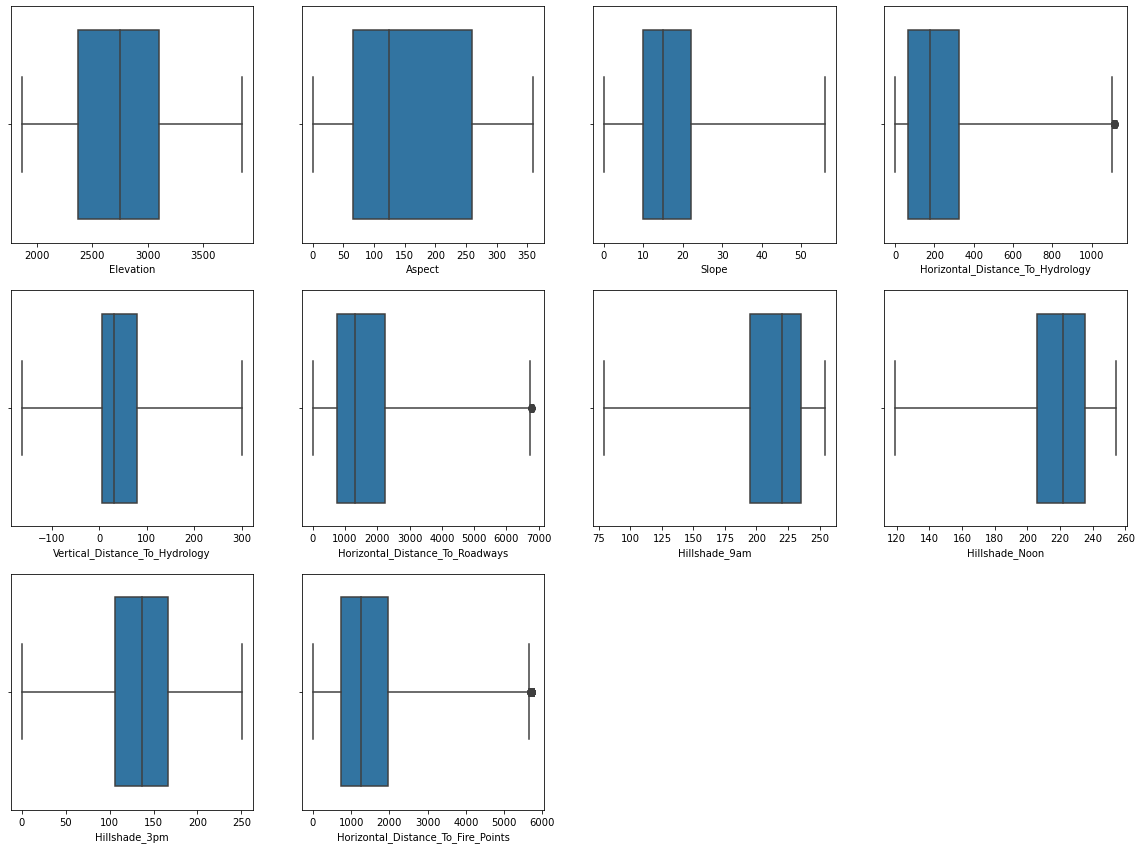

In [23]:
index=0
plt.figure(figsize=(20,20))
for i in df.columns[:10]:
    index +=1
    plt.subplot(4,4,index)
    sns.boxplot(x=i,data=df, whis=3)

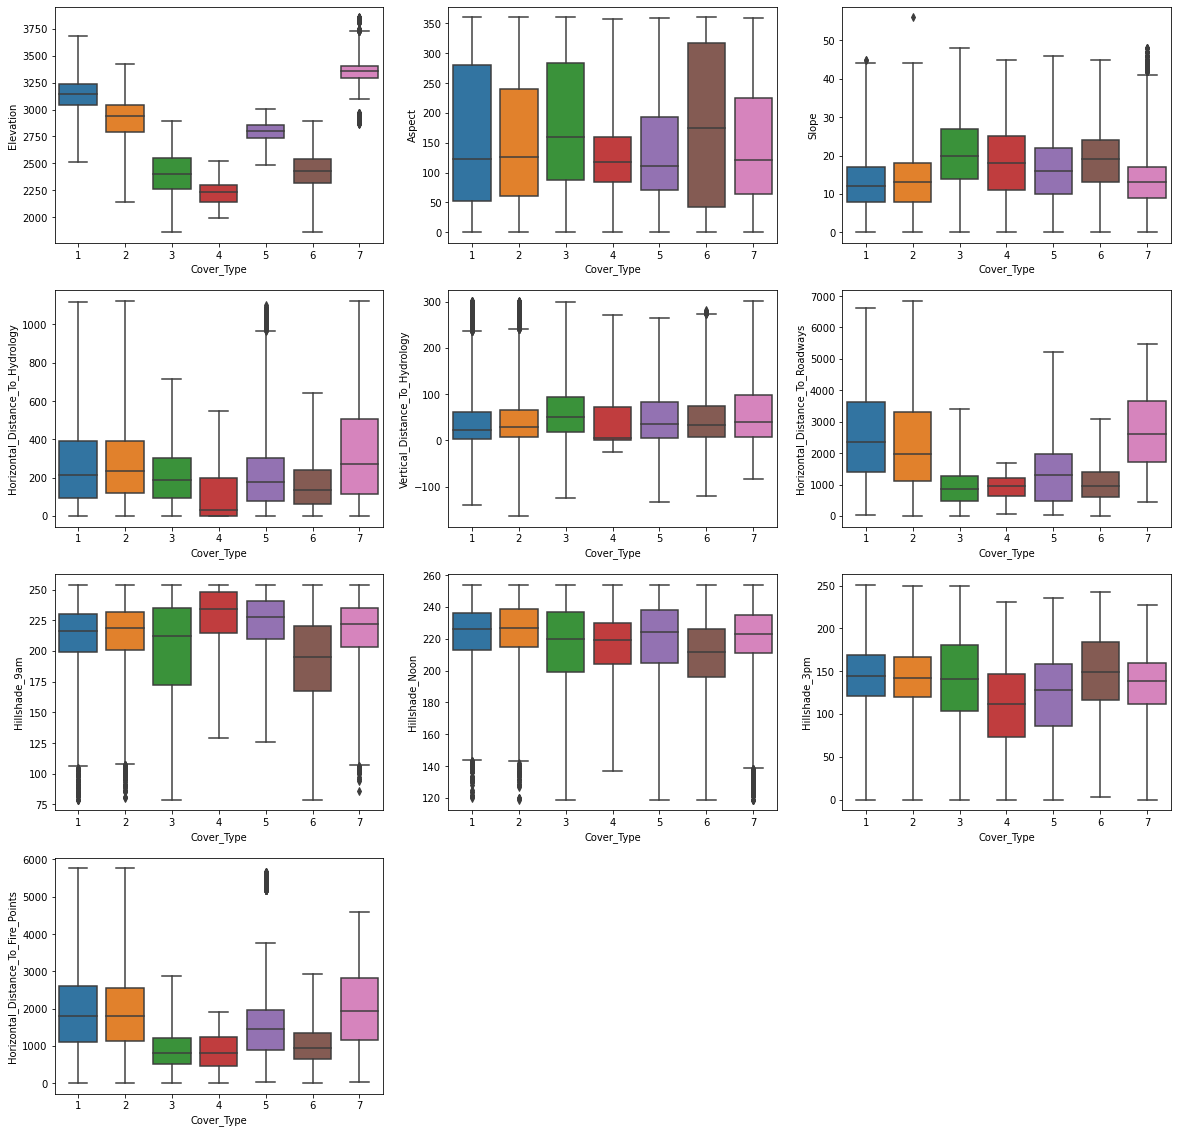

In [24]:
index=0
plt.figure(figsize=(20,20))
for i in df.columns[:10]:
    index +=1
    plt.subplot(4,3,index)
    sns.boxplot(x="Cover_Type",y=i,data=df, whis=3)

In [25]:
df.shape

(245720, 55)

In [26]:
250000-df.shape[0]

4280

In [27]:
df.isnull().sum().sum()

0

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [28]:
df['Hypotenuse']=round((df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)**0.5, 0)
df['Hypotenuse']

0        217.000
1        140.000
2        361.000
3        322.000
4        521.000
           ...  
249994   351.000
249995    52.000
249996   291.000
249997     0.000
249998     0.000
Name: Hypotenuse, Length: 245720, dtype: float64

In [29]:
df["Hyd_Road_avg"]=round((df["Horizontal_Distance_To_Hydrology"]+df["Horizontal_Distance_To_Roadways"])/2, 0)
df["Hyd_Road_avg"]

0        1228.000
1        1934.000
2        2358.000
3         795.000
4         538.000
           ...   
249994    953.000
249995    258.000
249996   1139.000
249997    714.000
249998    674.000
Name: Hyd_Road_avg, Length: 245720, dtype: float64

In [30]:
df["Hydro_Ele_avg"]=round((df["Horizontal_Distance_To_Hydrology"]+df["Elevation"])/2, 0)
df["Hydro_Ele_avg"]

0        1454.000
1        1702.000
2        1814.000
3        1558.000
4        1878.000
           ...   
249994   1478.000
249995   1080.000
249996   1562.000
249997   1168.000
249998   1282.000
Name: Hydro_Ele_avg, Length: 245720, dtype: float64

In [31]:
df.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1,inplace=True)

In [32]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type', 'Hypotenu

In [33]:
df.shape

(245720, 56)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245720 entries, 0 to 249998
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           245720 non-null  int64  
 1   Aspect                              245720 non-null  int64  
 2   Slope                               245720 non-null  int64  
 3   Horizontal_Distance_To_Roadways     245720 non-null  int64  
 4   Hillshade_9am                       245720 non-null  int64  
 5   Hillshade_Noon                      245720 non-null  int64  
 6   Hillshade_3pm                       245720 non-null  int64  
 7   Horizontal_Distance_To_Fire_Points  245720 non-null  int64  
 8   Wilderness_Area_1                   245720 non-null  int64  
 9   Wilderness_Area_2                   245720 non-null  int64  
 10  Wilderness_Area_3                   245720 non-null  int64  
 11  Wilderness_Area_4         

In [35]:
df.sample()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse,Hyd_Road_avg,Hydro_Ele_avg
79350,3106,29,16,4349,213,204,122,3865,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,765.000,2545.000,1924.000


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [37]:
df2 = pd.read_csv("treetypes.csv")

In [38]:
df2.shape

(250000, 55)

In [39]:
df.shape

(245720, 56)

In [40]:
X=df.drop("Cover_Type", axis=1)
y=df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=101)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [43]:
from sklearn.svm import SVC, LinearSVC
svm_model = LinearSVC(class_weight = "balanced", random_state = 101)
svm_model.fit(X_train_scaled, y_train)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_train_scaled)

In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6938 1529    9    0  621  106 1334]
 [2539 4851  251    9 2011  515   76]
 [   0   38 5471 1555  665 2857    0]
 [   0    0  534 9694    0  431    0]
 [ 342 1560  847    0 7324  544    0]
 [   1  365 1809 1223 1133 6167    0]
 [1057    8   29    0   73    5 9195]]
              precision    recall  f1-score   support

           1       0.64      0.66      0.65     10537
           2       0.58      0.47      0.52     10252
           3       0.61      0.52      0.56     10586
           4       0.78      0.91      0.84     10659
           5       0.62      0.69      0.65     10617
           6       0.58      0.58      0.58     10698
           7       0.87      0.89      0.88     10367

    accuracy                           0.67     73716
   macro avg       0.67      0.67      0.67     73716
weighted avg       0.67      0.67      0.67     73716



In [45]:
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.6733951923598676

In [46]:
svm_f1 = f1_score(y_test, y_pred, average = "macro")
svm_f1

0.6679190393104338

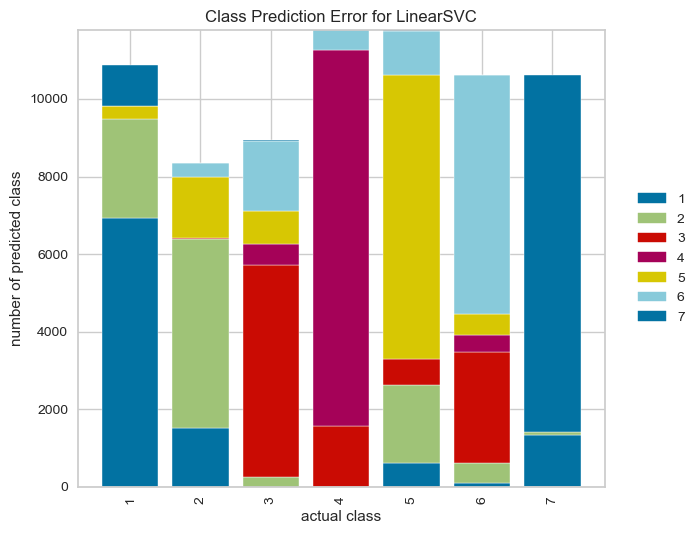

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [47]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

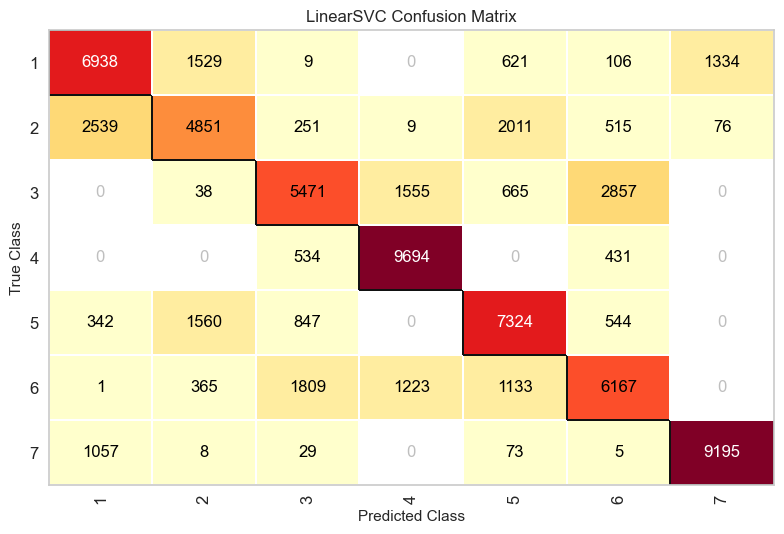

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

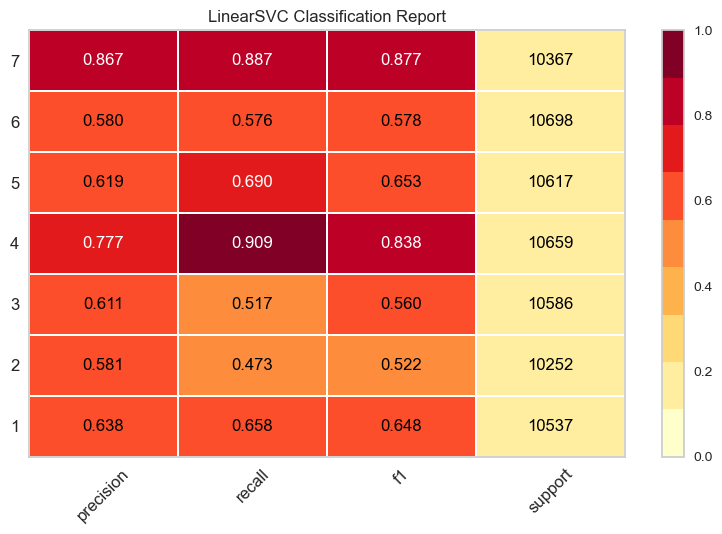

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [49]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [52]:
print(confusion_matrix(y_test,y_pred), '\n', '\n')
print(classification_report(y_test,y_pred))

[[ 9033  1203     1     0    47    16   237]
 [ 1216  8419   152     0   288   138    39]
 [    6    88  9901   118    34   439     0]
 [    0     1    62 10552     0    44     0]
 [   30   108    21     0 10431    26     1]
 [    6    73   348    51    26 10194     0]
 [  141    17     0     0     0     0 10209]] 
 

              precision    recall  f1-score   support

           1       0.87      0.86      0.86     10537
           2       0.85      0.82      0.84     10252
           3       0.94      0.94      0.94     10586
           4       0.98      0.99      0.99     10659
           5       0.96      0.98      0.97     10617
           6       0.94      0.95      0.95     10698
           7       0.97      0.98      0.98     10367

    accuracy                           0.93     73716
   macro avg       0.93      0.93      0.93     73716
weighted avg       0.93      0.93      0.93     73716



In [55]:
tree_accuracy = accuracy_score(y_pred, y_test)
tree_f1 = f1_score(y_test, y_pred, average='macro')
tree_f1

0.9316434544763817

In [54]:
tree_accuracy

0.9324841282760866

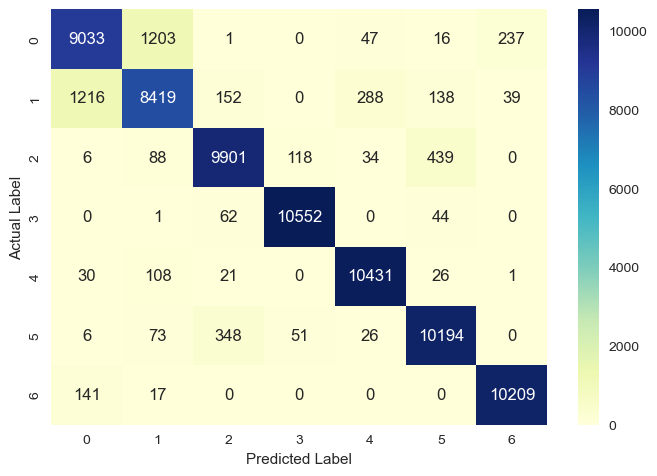

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [57]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101).fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)

In [58]:
print(confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

[[ 9589   756     2     0    37     9   144]
 [  742  9034   134     1   185   143    13]
 [    0     6 10255    84    13   228     0]
 [    0     0    10 10646     0     3     0]
 [    1     9    14     0 10589     4     0]
 [    0     5   113    37     5 10538     0]
 [   29     3     0     0     2     0 10333]] 

              precision    recall  f1-score   support

           1       0.93      0.91      0.92     10537
           2       0.92      0.88      0.90     10252
           3       0.97      0.97      0.97     10586
           4       0.99      1.00      0.99     10659
           5       0.98      1.00      0.99     10617
           6       0.96      0.99      0.97     10698
           7       0.99      1.00      0.99     10367

    accuracy                           0.96     73716
   macro avg       0.96      0.96      0.96     73716
weighted avg       0.96      0.96      0.96     73716



In [59]:
rf_accuracy = rf_model.score(X_test,y_test)
rfc_f1 = f1_score(y_test, y_pred, average='macro')
rfc_f1

0.9623169343022211

In [60]:
rf_accuracy

0.9629388463834174

Text(0.5, 41.47222222222222, 'Predicted Label')

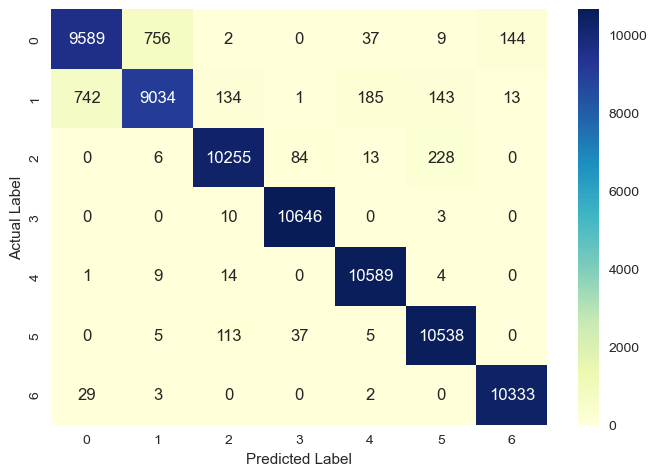

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

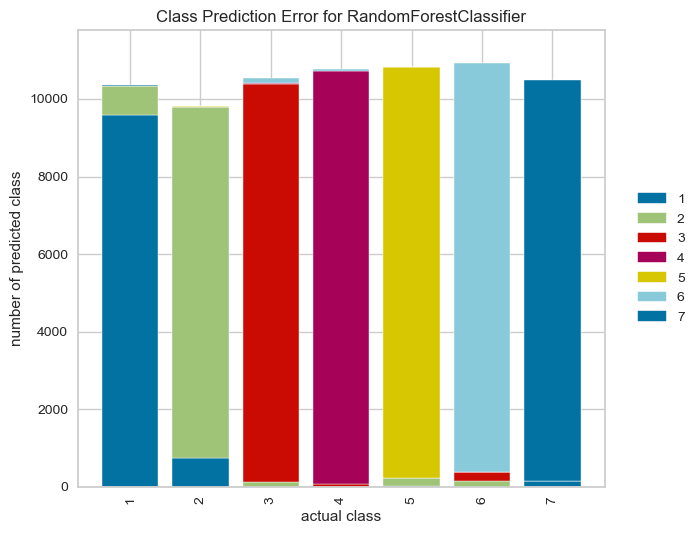

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [62]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

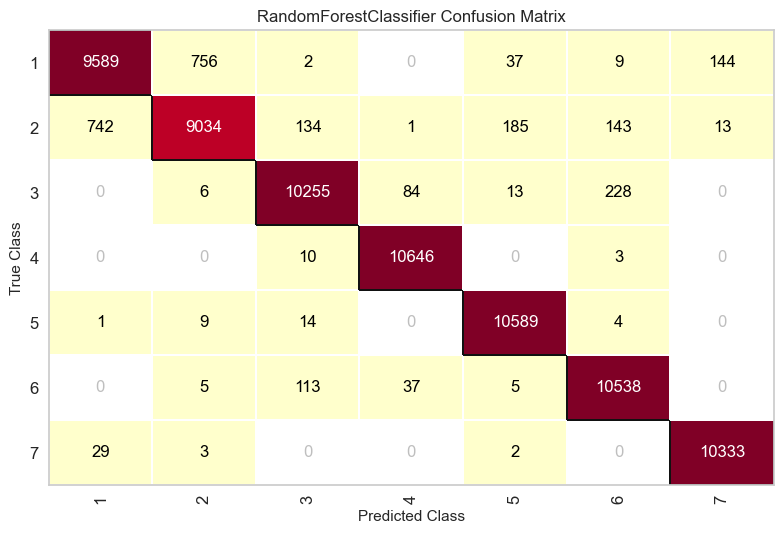

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

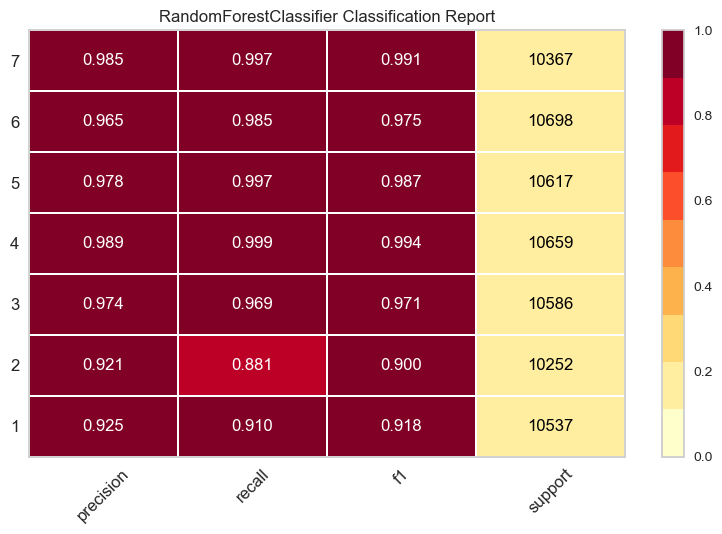

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [64]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [65]:
from xgboost import XGBClassifier

In [66]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

In [67]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)

In [68]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7156  1321    12     0   594    30  1424]
 [ 2433  4908   220     1  2091   469   130]
 [    0     1  6696   910   291  2688     0]
 [    0     0   269 10300     0    90     0]
 [   19   251   293     0  9754   300     0]
 [    0    10  2195   382   296  7815     0]
 [  581     0     0     0     8     0  9778]]
              precision    recall  f1-score   support

           1       0.70      0.68      0.69     10537
           2       0.76      0.48      0.59     10252
           3       0.69      0.63      0.66     10586
           4       0.89      0.97      0.93     10659
           5       0.75      0.92      0.82     10617
           6       0.69      0.73      0.71     10698
           7       0.86      0.94      0.90     10367

    accuracy                           0.77     73716
   macro avg       0.76      0.76      0.76     73716
weighted avg       0.76      0.77      0.76     73716



In [69]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average='macro')
xgb_f1

0.7566919375077958

In [70]:
xgb_accuracy

0.7651934451136795

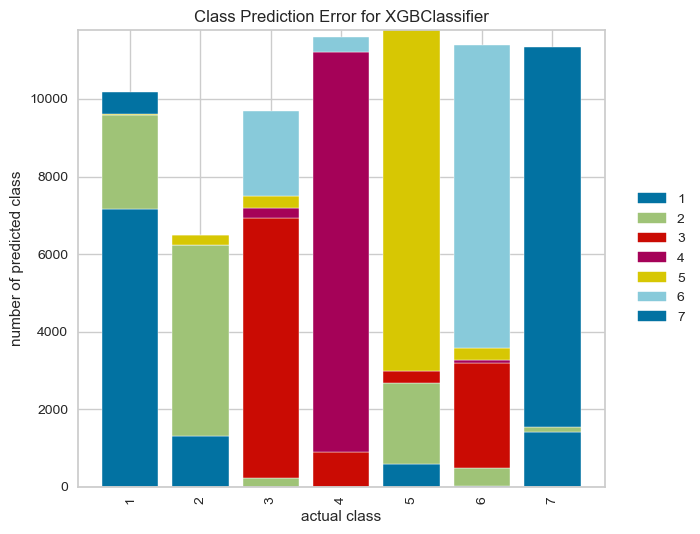

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [71]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

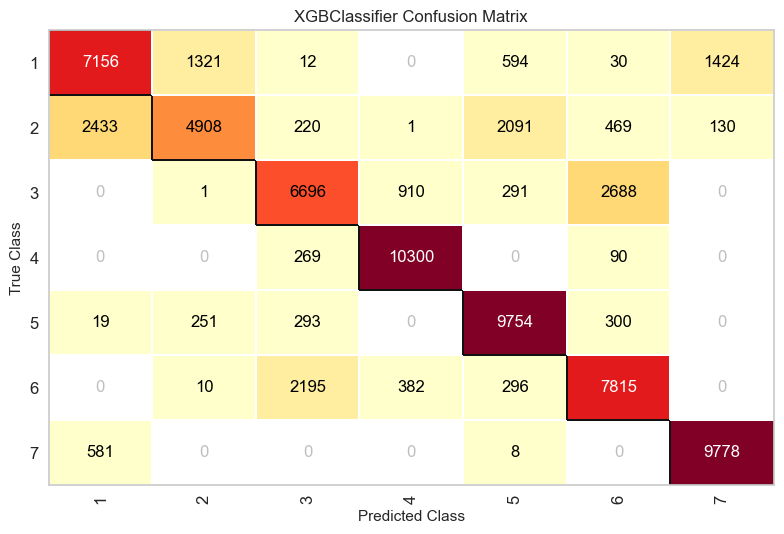

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [72]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

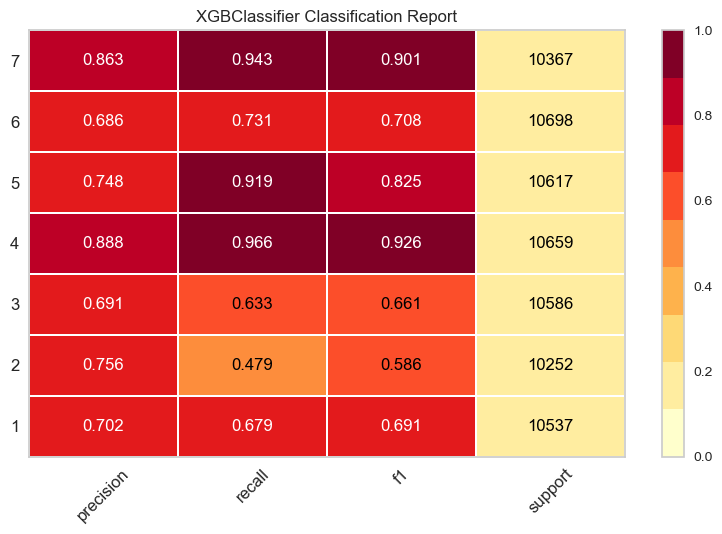

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [73]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

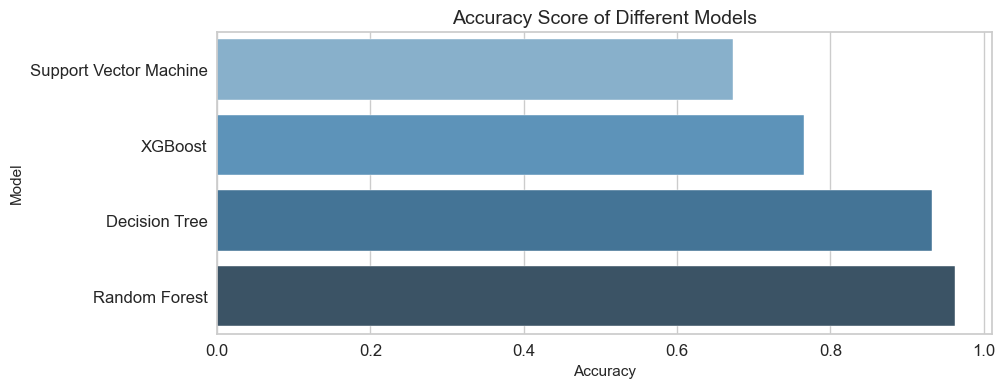

In [74]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost", "Decision Tree", "Support Vector Machine"],
                        "Accuracy": [rf_accuracy, xgb_accuracy, tree_accuracy, svm_acc]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

# F1 Score Comparison

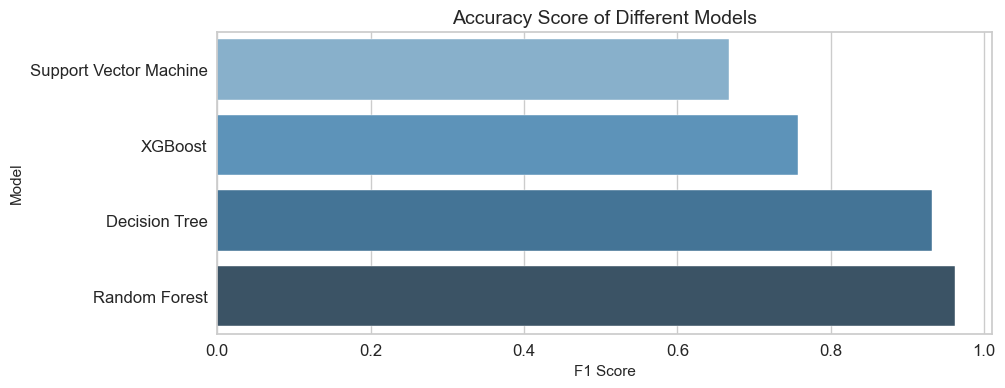

In [75]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost", "Decision Tree", "Support Vector Machine"],
                        "F1 Score": [rfc_f1, xgb_f1, tree_f1, svm_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___